# Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Dataset

In this homework, we will use the Car price dataset.



We'll keep working with the MSRP variable, and we'll transform it to a classification task.
Features

For the rest of the homework, you'll need to use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

Data preparation

* Select only the features from above and transform their names using next line:

- data.columns = data.columns.str.replace(' ', '_').str.lower()

* Fill in the missing values of the selected features with 0.
Rename MSRP variable to price.

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [4]:
df = df[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','msrp']]
df.columns = ['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','price']

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [8]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

Question 2

* Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?



<Axes: >

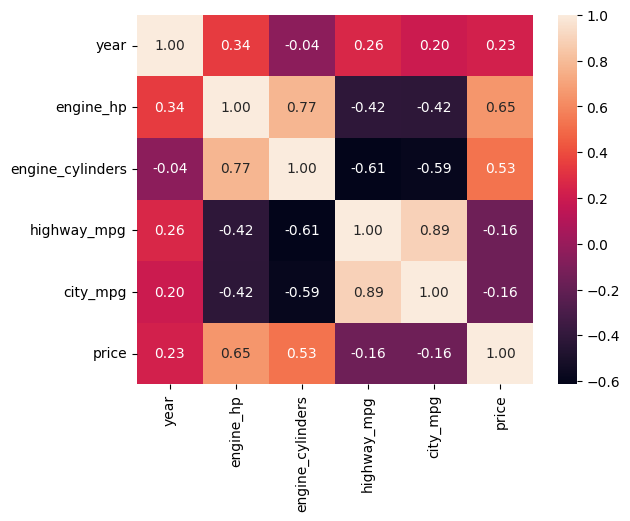

In [9]:
sns.heatmap(df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','price']].corr(), annot=True, fmt='.2f')

Make price binary

* Now we need to turn the price variable from numeric into a binary format.
* Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.


In [10]:
mean_price = df.price.mean()
mean_price

40594.737032063116

In [11]:
df['above_average'] = (df.price > mean_price).astype(int)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int32

Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (price) is not in your dataframe.


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
len(df_full_train), len(df_test)

(9531, 2383)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
len(df_train),len(df_val), len(df_test)

(7148, 2383, 2383)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [19]:
del df_train['price']
del df_val['price']
del df_test['price']

In [20]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

Question 3

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
strings = ['make','model','transmission_type','vehicle_style']

In [23]:
for c in strings:
    print(c, mutual_info_score(y_train, df_train[c]))

make 0.23976875439118348
model 0.46234389209653004
transmission_type 0.02095754189630187
vehicle_style 0.08414301956779438


Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [28]:
y_pred = model.predict_proba(X_val)[:, 1]

In [29]:
y_pred_ = (y_pred >= 0.5)

In [30]:
accuracy = (y_val == y_pred_).mean()

In [31]:
round(accuracy,2)

0.95

Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

In [32]:
features = ['year','engine_hp','transmission_type','city_mpg']

In [33]:
for i in features:    
    df_train_tr = df_train.drop(i,axis=1)
    train_tr_dicts = df_train_tr.to_dict(orient = 'records')
    X_train_tr = dv.fit_transform(train_tr_dicts)
    df_val_tr = df_val.drop(i,axis=1)
    val_tr_dicts = df_val_tr.to_dict(orient = 'records')
    X_val_tr = dv.transform(val_tr_dicts)
    model.fit(X_train_tr, y_train)
    y_pred_tr = model.predict_proba(X_val_tr)[:,1]
    accuracion_tr = (y_pred_tr >= 0.5)
    tr_accuracy = (y_val == accuracion_tr).mean()
    print('Diferencia sin '+i,accuracy - tr_accuracy)

Diferencia sin year -0.002937473772555599
Diferencia sin engine_hp 0.01720520352496857
Diferencia sin transmission_type 0.0
Diferencia sin city_mpg 0.012589173310952662


Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?


In [34]:
from sklearn.linear_model import Ridge

In [35]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
y_train = df_train.price.values
y_val = df_val.price.values

In [36]:
del df_train['price']
del df_val['price']

In [37]:
del df_train['above_average']
del df_val['above_average']

In [38]:
def RMSE(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [39]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
for i in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=i,solver='sag', random_state=42)
    model.fit(X_train, np.log1p(y_train))
    y_pred_ridge = model.predict(X_val)
    print(f'alpha: {i}, RMSE:{round(RMSE(np.log1p(y_val),y_pred_ridge),3)}')

c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0, RMSE:0.487


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0.01, RMSE:0.487


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0.1, RMSE:0.487


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 1, RMSE:0.487
alpha: 10, RMSE:0.487


c:\Users\daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
